# Einführung in die Rasteranalyse-Toolbox
in this introction a basic workflow for model creation is presented

In [1]:
# load packages
import geopandas as gpd
import pandas as pd
import seaborn as sns


# load modules
from census_100_file_loader import file_loader,census_loader
from census_100_geocoder import Glocer
from census_100_tile_loader import tile_loader

from census_100_demands import Demands
from census_100_regression_analysis import regression_analysis
import numpy as np

Can't load requested DLL: C:\Program Files\QGIS 3.32.3\apps\gdal\lib\gdalplugins\gdal_ECW_JP2ECW.dll
126: Das angegebene Modul wurde nicht gefunden.

Can't load requested DLL: C:\Program Files\QGIS 3.32.3\apps\gdal\lib\gdalplugins\gdal_ECW_JP2ECW.dll
126: Das angegebene Modul wurde nicht gefunden.

Can't load requested DLL: C:\Program Files\QGIS 3.32.3\apps\gdal\lib\gdalplugins\gdal_GEOR.dll
126: Das angegebene Modul wurde nicht gefunden.

Can't load requested DLL: C:\Program Files\QGIS 3.32.3\apps\gdal\lib\gdalplugins\gdal_GEOR.dll
126: Das angegebene Modul wurde nicht gefunden.

Can't load requested DLL: C:\Program Files\QGIS 3.32.3\apps\gdal\lib\gdalplugins\gdal_HDF5.dll
126: Das angegebene Modul wurde nicht gefunden.

Can't load requested DLL: C:\Program Files\QGIS 3.32.3\apps\gdal\lib\gdalplugins\gdal_HDF5.dll
126: Das angegebene Modul wurde nicht gefunden.

Can't load requested DLL: C:\Program Files\QGIS 3.32.3\apps\gdal\lib\gdalplugins\gdal_MrSID.dll
126: Das angegebene Modul wu

## the file loader takes care of loading all needed files

In [2]:
# datasets to load
dataframes = ['gas', 'zensus', 'hauskoordinaten', 'servicearea']

# projects to load the data from
projekte = ['dummy']
path = 'C:\\Users\\fischerm\\BBH Consulting AG\\Intern_BBHC GF Integrierte Netzplanung - Dokumente\\Abschlussarbeiten\\Manuel Fischer\\08_Übermittlung\\Rastermodel'
database = "/untersuchungsgebiet"
data = file_loader(path=path, dataframes=dataframes, projekte=projekte, database=database)

start to load files from C:\Users\fischerm\BBH Consulting AG\Intern_BBHC GF Integrierte Netzplanung - Dokumente\Abschlussarbeiten\Manuel Fischer\08_Übermittlung\Rastermodel/untersuchungsgebiet/demands/gas/
load file gas_demand_data_dummy.xlsx
start to load files from C:\Users\fischerm\BBH Consulting AG\Intern_BBHC GF Integrierte Netzplanung - Dokumente\Abschlussarbeiten\Manuel Fischer\08_Übermittlung\Rastermodel/untersuchungsgebiet/service_area/
teilnetzgebiete_dummy.gpkg has layers: ['teilnetzgebiete_dummy'] loading layer: teilnetzgebiete_dummy
start to load files from C:\Users\fischerm\BBH Consulting AG\Intern_BBHC GF Integrierte Netzplanung - Dokumente\Abschlussarbeiten\Manuel Fischer\08_Übermittlung\Rastermodel/untersuchungsgebiet/HK/projekte/
ahk_dummy.gpkg has layers: ['teilnetzgebiete_dummy'] loading layer: teilnetzgebiete_dummy
start to load files from C:\Users\fischerm\BBH Consulting AG\Intern_BBHC GF Integrierte Netzplanung - Dokumente\Abschlussarbeiten\Manuel Fischer\08_Über

## demands is a tool to geolocate addresses with the help of AHK
it can also save and load the results of the geocoding

In [3]:
# load demands on tile level
# load demands on raster
d = Demands(data)
d.culc_heat_demand()


no googleV3 loaded. Cant golocate with google
Addresses are compared within the postal codes: {'24598'}
starting with postal code: 24598
manual correction of fuzz street matching. schore 75:
Demand: Auw. 
Match: Auweg

matched!
manual correction of fuzz street matching. schore 71:
Demand: Bargstr. 
Match: Bergstraße

Not matched!
Info: you should previously run: fuzz_street
---- 24598 Westpreußenstraße ----
---- 24598 Vosskoppel ----
---- 24598 Erlenweg ----
---- 24598 Heidenbarg ----
---- 24598 Dorfskoppel ----
---- 24598 Oberer Gooskamp ----
---- 24598 Kiefernweg ----
---- 24598 Ostpreußenstraße ----
---- 24598 Steenknüll ----
---- 24598 Waldweg ----
---- 24598 Bergstraße ----
---- 24598 Kalkberg ----
---- 24598 Bahnhofstraße ----
---- 24598 Eichenweg ----
---- 24598 Pommernstraße ----
---- 24598 Neumünsterstraße ----
---- 24598 Hein-Gas-Straße ----
---- 24598 Forstweg ----
---- 24598 Halloher Weg ----
---- 24598 Gooskamp ----
---- 24598 Münsterberg ----
---- 24598 Steenkoppel ----
-

In [4]:
demand = d.raster_demand

In [5]:
'''
# geocode as in the geocoder tutorial
geocoder = Glocer(data)
geocoder.fuzz_street(threshold=80, export_excel='fuzzy_street', manual_correct=True)
geocoder.fuzz_hnr()
geocoder.geolocate_demlocs(ahk_short=True)
geocoder.geolocate_demands()

# now save the file
geocoder.demands.to_file('demands_20240604.gpkg', Driver='GPKG')

# now load the geocoding
dem = Demands(data, 'demands_20240604.gpkg')
dem.culc_heat_demand()
dem.raster_demand

#  export the geolocated demands for inspection in QGIS
demand = dem.demands_heat.copy()
demand = gpd.GeoDataFrame(data=demand.drop('geometry', axis=1),geometry=demand['geometry'])
'''

"\n# geocode as in the geocoder tutorial\ngeocoder = Glocer(data)\ngeocoder.fuzz_street(threshold=80, export_excel='fuzzy_street', manual_correct=True)\ngeocoder.fuzz_hnr()\ngeocoder.geolocate_demlocs(ahk_short=True)\ngeocoder.geolocate_demands()\n\n# now save the file\ngeocoder.demands.to_file('demands_20240604.gpkg', Driver='GPKG')\n\n# now load the geocoding\ndem = Demands(data, 'demands_20240604.gpkg')\ndem.culc_heat_demand()\ndem.raster_demand\n\n#  export the geolocated demands for inspection in QGIS\ndemand = dem.demands_heat.copy()\ndemand = gpd.GeoDataFrame(data=demand.drop('geometry', axis=1),geometry=demand['geometry'])\n"

## load census tables

for faster loading only census tiles within the research area are kept. to create thislike files simply load the full table and boolean mask it with: <br>

table[table["Gitter_ID_100m].isin(data.zensus100.index)] <br>

<ul>
<li>The tables are not prepares in a perfect way. population and demography table have deliminator ",", all other tables have ";". </li>
<li>encoding for some tables are broken, use encoding_errors='ignore' to fix. special german signs are excluded</li>
</ul>

In [36]:
census = census_loader()
census.load_census(select_tables=True, 
                   select_features=True)
census_values = census.census_abs
census_values = census.census_rel

## the tile_loader is your tool to recive tiles
the grid_100_quality is special in the way, that it contains the actual demands. it also is foundation to set thresholds and the IQR-factor. 

In [37]:
tiler = tile_loader(data, demand)

In [38]:
qual = tiler.make_grid_100_quality()


the geopackages are precomputed in QGIS for entire germany. Python tooling is intended using rasterio. recive the dataframes via xxx. <br>
<ul>
<li>100 meter grid Raster: rasterpixel zu punkten (QGIS-processing tool)</li>
<li>clc: downloaded as geopackage -> clip with research area </li>
</ul>

In [39]:
# builds = tiler.make_grid_100_building()
sbu = tiler.make_grid_100_sbu(path_sbu='daten\\raster\\SBU_2018_100m_03035_V1_0.tif')
imd = tiler.make_grid_100_imd(path_imd='daten\\raster\\IMD_2018_100m_03035_V2_0.tif')

C:\Users\fischerm\AppData\Local\Temp\ipykernel_5896\1966088251.py:2: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  sbu = tiler.make_grid_100_sbu(path_sbu='daten\\raster\\SBU_2018_100m_03035_V1_0.tif')
C:\Users\fischerm\AppData\Local\Temp\ipykernel_5896\1966088251.py:3: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  imd = tiler.make_grid_100_imd(path_imd='daten\\raster\\IMD_2018_100m_03035_V2_0.tif')


In [40]:
clc = tiler.make_grid_100_clc('daten\\raster\\CLCplus_2018_010m.tif')

C:\Users\fischerm\AppData\Local\Temp\ipykernel_5896\918951974.py:1: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  clc = tiler.make_grid_100_clc('daten\\raster\\CLCplus_2018_010m.tif')


In [41]:
cc = pd.concat([sbu, clc, qual["points_ahk"], census_values], axis=1, join='inner')

In [42]:
len(cc)

348

In [43]:
cc = cc.dropna()
len(cc)

241

## regression analysis helps to create and tune regression modells

In [44]:
regression = regression_analysis(qual, cc)

FACTOR: 1.0
lower bound is -42370. culc as 144599.02500000002 - 1.0 * 186969
upper bound is 518538. culc as 331568.6 - 1.0 * 186969
FACTOR: 0.97
lower bound is -36761. culc as 144599.02500000002 - 0.97 * 186969
upper bound is 512929. culc as 331568.6 - 0.97 * 186969
FACTOR: 0.94
lower bound is -31152. culc as 144599.02500000002 - 0.94 * 186969
upper bound is 507320. culc as 331568.6 - 0.94 * 186969
FACTOR: 0.9099999999999999
lower bound is -25543. culc as 144599.02500000002 - 0.91 * 186969
upper bound is 501710. culc as 331568.6 - 0.91 * 186969
FACTOR: 0.8799999999999999
lower bound is -19934. culc as 144599.02500000002 - 0.88 * 186969
upper bound is 496101. culc as 331568.6 - 0.88 * 186969
FACTOR: 0.8499999999999999
lower bound is -14325. culc as 144599.02500000002 - 0.85 * 186969
upper bound is 490492. culc as 331568.6 - 0.85 * 186969
FACTOR: 0.8199999999999998
lower bound is -8716. culc as 144599.02500000002 - 0.82 * 186969
upper bound is 484883. culc as 331568.6 - 0.82 * 186969
FAC

C:\Users\fischerm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73526317.45942688, tolerance: 49353562.389642656
  model = cd_fast.enet_coordinate_descent_gram(


FACTOR: 0.7299999999999998
lower bound is 8111. culc as 144599.02500000002 - 0.73 * 186969
upper bound is 468056. culc as 331568.6 - 0.73 * 186969


C:\Users\fischerm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73526317.45942688, tolerance: 49353562.389642656
  model = cd_fast.enet_coordinate_descent_gram(


FACTOR: 0.6999999999999997
lower bound is 13720. culc as 144599.02500000002 - 0.7 * 186969
upper bound is 462447. culc as 331568.6 - 0.7 * 186969
FACTOR: 0.6699999999999997
lower bound is 19329. culc as 144599.02500000002 - 0.67 * 186969
upper bound is 456838. culc as 331568.6 - 0.67 * 186969
FACTOR: 0.6399999999999997
lower bound is 24938. culc as 144599.02500000002 - 0.64 * 186969
upper bound is 451229. culc as 331568.6 - 0.64 * 186969
FACTOR: 0.6099999999999997
lower bound is 30547. culc as 144599.02500000002 - 0.61 * 186969
upper bound is 445620. culc as 331568.6 - 0.61 * 186969
FACTOR: 0.5799999999999996
lower bound is 36156. culc as 144599.02500000002 - 0.58 * 186969
upper bound is 440010. culc as 331568.6 - 0.58 * 186969
FACTOR: 0.5499999999999996
lower bound is 41765. culc as 144599.02500000002 - 0.55 * 186969
upper bound is 434401. culc as 331568.6 - 0.55 * 186969
FACTOR: 0.5199999999999996
lower bound is 47374. culc as 144599.02500000002 - 0.52 * 186969
upper bound is 428792.

C:\Users\fischerm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39629740.30809021, tolerance: 23257116.44354842
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fischerm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39400305.7225647, tolerance: 23257116.44354842
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fischerm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:664: Converge

FACTOR: 0.3399999999999994
lower bound is 81029. culc as 144599.02500000002 - 0.34 * 186969
upper bound is 395138. culc as 331568.6 - 0.34 * 186969


C:\Users\fischerm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39629740.30809021, tolerance: 23257116.44354842
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fischerm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39400305.7225647, tolerance: 23257116.44354842
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\fischerm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:664: Converge

FACTOR: 0.3099999999999994
lower bound is 86638. culc as 144599.02500000002 - 0.31 * 186969
upper bound is 389529. culc as 331568.6 - 0.31 * 186969


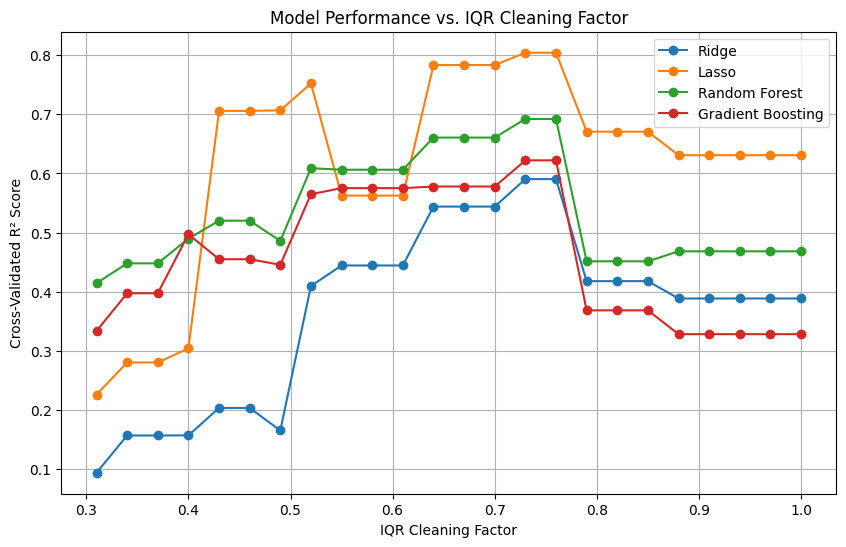

{'Ridge': 0.7299999999999998,
 'Lasso': 0.7299999999999998,
 'Random Forest': 0.7299999999999998,
 'Gradient Boosting': 0.7299999999999998}

In [45]:
regression.best_IQR_clean(factors = np.arange(1, 0.3, -0.03))

FACTOR: 0.73
lower bound is 9622. culc as 145632.2 - 0.73 * 186315
upper bound is 467957. culc as 331947.4 - 0.73 * 186315
FACTOR: 0.73
lower bound is 9622. culc as 145632.2 - 0.73 * 186315
upper bound is 467957. culc as 331947.4 - 0.73 * 186315
FACTOR: 0.73
lower bound is 9622. culc as 145632.2 - 0.73 * 186315
upper bound is 467957. culc as 331947.4 - 0.73 * 186315
FACTOR: 0.73
lower bound is 8691. culc as 145253.95 - 0.73 * 187072
upper bound is 468888. culc as 332326.2 - 0.73 * 187072
FACTOR: 0.73
lower bound is 8691. culc as 145253.95 - 0.73 * 187072
upper bound is 468888. culc as 332326.2 - 0.73 * 187072
FACTOR: 0.73
lower bound is 8691. culc as 145253.95 - 0.73 * 187072
upper bound is 468888. culc as 332326.2 - 0.73 * 187072
FACTOR: 0.73
lower bound is 8062. culc as 144926.48750000002 - 0.73 * 187484
upper bound is 469275. culc as 332411.2 - 0.73 * 187484
FACTOR: 0.73
lower bound is 8062. culc as 144926.48750000002 - 0.73 * 187484
upper bound is 469275. culc as 332411.2 - 0.73 * 

C:\Users\fischerm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73526317.45942688, tolerance: 49353562.389642656
  model = cd_fast.enet_coordinate_descent_gram(


FACTOR: 0.73
lower bound is 8111. culc as 144599.02500000002 - 0.73 * 186969
upper bound is 468056. culc as 331568.6 - 0.73 * 186969


C:\Users\fischerm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73526317.45942688, tolerance: 49353562.389642656
  model = cd_fast.enet_coordinate_descent_gram(


FACTOR: 0.73
lower bound is 8111. culc as 144599.02500000002 - 0.73 * 186969
upper bound is 468056. culc as 331568.6 - 0.73 * 186969


C:\Users\fischerm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73526317.45942688, tolerance: 49353562.389642656
  model = cd_fast.enet_coordinate_descent_gram(


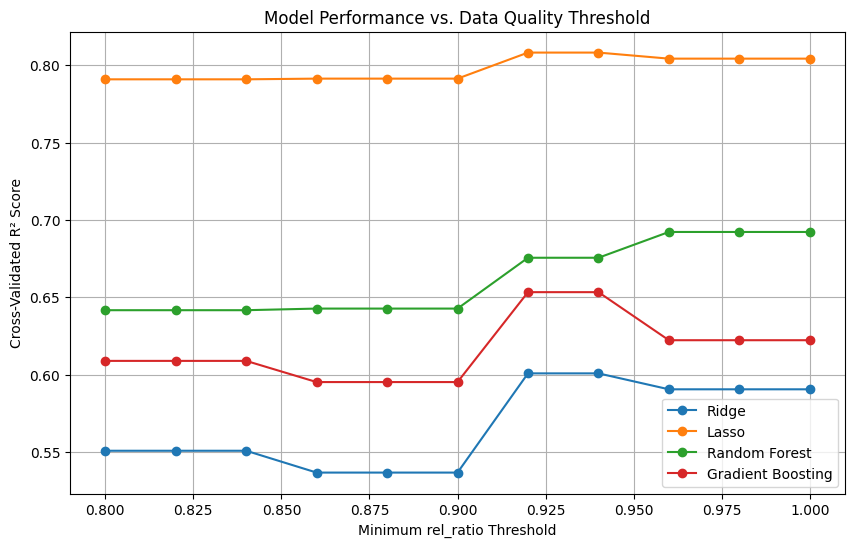

{'Ridge': 0.9400000000000001,
 'Lasso': 0.9400000000000001,
 'Random Forest': 1.0,
 'Gradient Boosting': 0.9400000000000001}

In [59]:
regression.best_threshold(factor=0.73) # let me give you {'model': factor}

In [47]:
X, y = regression.get_X_y()

FACTOR: 1
lower bound is -42370. culc as 144599.02500000002 - 1 * 186969
upper bound is 518538. culc as 331568.6 - 1 * 186969


In [60]:
pred = regression.pred(threshold=0.94, factor=0.73, model='Lasso')

FACTOR: 0.73
lower bound is 8062. culc as 144926.48750000002 - 0.73 * 187484
upper bound is 469275. culc as 332411.2 - 0.73 * 187484


In [61]:
pred.rename('b')

100mN34361E43255     66077.610507
100mN34360E43254    237452.051434
100mN34360E43255    216030.246318
100mN34360E43256    194608.441202
100mN34359E43256    173186.636086
                        ...      
100mN34309E43203     87499.415623
100mN34308E43200     44655.805392
100mN34308E43201     66077.610507
100mN34308E43202    151764.830970
100mN34308E43203    130343.025855
Name: b, Length: 241, dtype: float64

In [62]:
df = regression.get_results()

In [63]:
df.columns[df.columns.duplicated()]

Index([], dtype='object')

In [64]:
df = gpd.GeoDataFrame(df, geometry="geometry")

In [65]:
df.columns = df.columns.astype(str)

In [66]:
df.columns[df.columns.duplicated()]

Index([], dtype='object')

In [67]:
df.to_file("b_ahk_clc_20240529.gpkg", driver="GPKG")

In [68]:
pd.DataFrame(data=pred, index=cc.index)

,prediction
100mN34361E43255,66077.610507
100mN34360E43254,237452.051434
100mN34360E43255,216030.246318
100mN34360E43256,194608.441202
100mN34359E43256,173186.636086
...,...
100mN34309E43203,87499.415623
100mN34308E43200,44655.805392
100mN34308E43201,66077.610507
100mN34308E43202,151764.830970


In [69]:
len(pred)

241

FACTOR: 0.73
lower bound is 8062. culc as 144926.48750000002 - 0.73 * 187484
upper bound is 469275. culc as 332411.2 - 0.73 * 187484
Mean Squared Error: 1168120699.2748106
R² score:  0.9024827164968723


c:\Users\fischerm\BBH Consulting AG\Intern_BBHC GF Integrierte Netzplanung - Dokumente\Abschlussarbeiten\Manuel Fischer\08_Übermittlung\Rastermodel\census_100_regression_analysis.py:149: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r', label='Perfect Prediction')


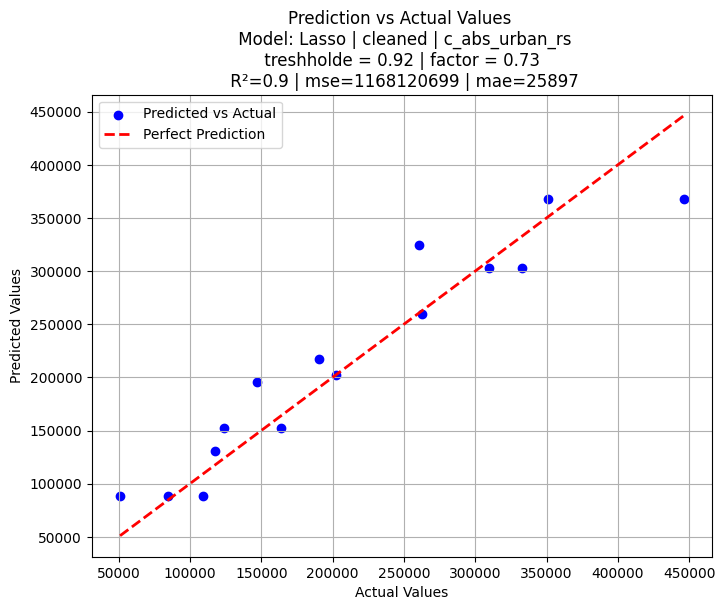

In [71]:
regression.pred_vs_actual(threshold=0.92, factor=0.73, model='Lasso')

In [ ]:

X, y = regression.get_X_y(threshold=0.92, factor=0.42, col="2020_heat")
regression.grid_100_features

lower bound is 31753. culc as 117050.3125 - 0.42 * 203087
upper bound is 405433. culc as 320137.4125 - 0.42 * 203087


,sbu,Sealed,Woody needle leaved trees,Woody Broadleaved deciduous trees,"Low-growing woody plants (bushes, shrubs)",Permanent herbaceous,Periodically herbaceous,Non- and sparsely-vegetated,Water,points_ahk
100mN34362E43175,0,0,0,0,0,0,100,0,0,NaN
100mN34362E43176,0,3,0,0,0,1,96,0,0,NaN
100mN34362E43177,0,3,0,24,0,5,68,0,0,NaN
100mN34362E43178,0,11,0,19,0,30,40,0,0,NaN
100mN34362E43179,1,19,0,11,0,60,10,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...
100mN34307E43266,0,0,0,0,0,53,47,0,0,NaN
100mN34307E43267,0,0,0,0,0,1,99,0,0,NaN
100mN34307E43268,0,0,0,0,0,0,100,0,0,NaN
100mN34307E43269,0,0,0,0,0,10,90,0,0,NaN


<Axes: >

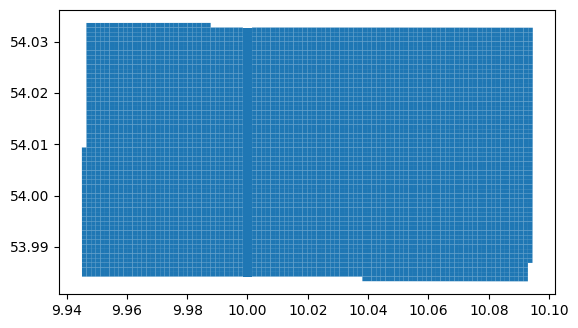

In [ ]:
regression.grid_100_qual.plot()

### ML

# import ML and vis functions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [ ]:
def pred(self, factor=1, threshold=1, model='Ridge', random_state=42):
        
        X, y = self.get_X_y(factor=factor, threshold=threshold)  

        # Create and fit a Ridge Regression model
        selected_model = models[model]  # You can adjust the regularization strength (alpha) as needed
        selected_model.fit(X, y)

        # Make predictions on the test set
        y_pred = selected_model.predict(self.grid_100_feature)
        return y_pred

In [ ]:

def best_IQR_clean(self, threshold=1, factors = np.arange(1.1, 0.8, -0.01), model_selection=['Ridge', 'Lasso', 'Random Forest', 'Gradient Boosting']):

    # Initialize a list to store R² scores and corresponding factors
    r2_scores =  {model_name: [] for model_name in model_selection}
    high_scores_dict = {model_name: 0 for model_name in model_selection}
    high_IQR_clean_dict = {model_name: 0 for model_name in model_selection}

    for factor in factors:
        X, y = self.get_X_y(factor=factor, threshold=threshold)  
        
        for model_name, model in models.items():
                if model_name in model_selection:
                    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
                    r2_scores[model_name].append(np.mean(scores))
                    
                    if high_scores_dict[model_name] <= np.mean(scores):
                            high_scores_dict[model_name] = np.mean(scores)
                            high_IQR_clean_dict[model_name] = factor

    '''means = [sum(sub_array) / len(sub_array) for sub_array in r2_scores]
    # Plotting the R² scores against the factors
    plt.figure(figsize=(10, 6))
    plt.plot(factors, means, marker='o')
    plt.xlabel('Outlier Cleaning Factor')
    plt.ylabel('R² Score')
    plt.title(f'R² Score by Outlier Cleaning Factor \n Model: c_abs_urban_rs | threshold: {threshold}')
    plt.grid(True)
    plt.show()'''
    
    # Plotting the results
    plt.figure(figsize=(10, 6))
    for model_name, scores in r2_scores.items():
        plt.plot(factor, scores, marker='o', label=model_name)
    plt.title('Model Performance vs. Data Quality Threshold')
    plt.xlabel('Minimum rel_ratio Threshold')
    plt.ylabel('Cross-Validated R² Score')
    plt.legend()
    plt.grid(True)
    plt.show()

    return high_IQR_clean_dict